In [18]:
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np
import cairosvg
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
d = {0: ((-31.716, -9.043, 13.716), 19), -1: ((-35.883, -9.919, 11.685), 23), 2: ((-31.908, -7.674, 13.321), 16), 3: ((-30.998, -6.757, 13.883), 16), -4: ((-32.729, -6.886, 12.479), 24), -5: ((-34.87, -9.848, 12.639), 7), 6: ((-30.007, -7.1, 14.731), 19), 7: ((-30.728, -9.391, 14.564), 19), 8: ((-29.94, -8.404, 15.006), 19), 9: ((-31.329, -5.519, 13.357), 16), 10: ((-32.388, -5.613, 12.497), 4), 11: ((-32.532, -10.055, 13.212), 19), 12: ((-33.524, -9.905, 12.22), 19), -13: ((-37.207, -9.753, 12.067), 7), -14: ((-37.529, -9.524, 13.391), 7), -15: ((-36.529, -9.485, 14.347), 7), -16: ((-35.2, -9.648, 13.978), 7)}

sdf_file = 'data/casf2016/4ih5/4ih5_ligand.sdf'
save_path = 'figure/4ih5_hitatt1.png'

# mol_supplier = Chem.SDMolSupplier(sdf_file)
# mol = next(mol_supplier)

with Chem.SDMolSupplier(sdf_file) as suppl:
  ms = [x for x in suppl if x is not None]
# for m in ms: tmp=AllChem.Compute2DCoords(m)
mol = ms[0]
tolerance = 1e-3

# Extract the 3D coordinates of the atoms in the molecule
conf = mol.GetConformer()

cluster_colors = [
    (1.0, 1.0, 0.0),
    (0.0, 0.0, 1.0),
    (1.0, 0.0, 0.0),
]
# Dictionary to map atom indices to cluster membership based on 3D positions
atom_colors = {}
highlight_atoms = []
# Find the cluster membership of each atom based on 3D positions if node >= 0
all_cluster_ids = set([cluster_id for node, (_, cluster_id) in d.items() if node >= 0])
id = {cluster_id: i for i, cluster_id in enumerate(all_cluster_ids)}
for atom in mol.GetAtoms():
    pos = conf.GetAtomPosition(atom.GetIdx())
    atom_pos = (pos.x, pos.y, pos.z)
    
    # Find the corresponding cluster membership in position_dict
    for node, (dict_pos, cluster_id) in d.items():
        if np.allclose(atom_pos, dict_pos, atol=tolerance):
            # Color the atom based on the cluster membership
            if node >= 0:
                highlight_atoms.append(atom.GetIdx())
                atom_colors[atom.GetIdx()] = cluster_colors[id[cluster_id]]
                # print(f'Atom {atom_idx} belongs to cluster {cluster_id}')
            break

# Generate 2D coordinates for the molecule
AllChem.Compute2DCoords(mol)
# smi = Chem.MolToSmiles(mol)
# # print(smi)
# mol = Chem.MolFromSmiles(smi)
# Draw the molecule with highlighted atoms
drawer = rdMolDraw2D.MolDraw2DCairo(2000, 2000)
drawer.drawOptions().addAtomIndices = True
rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol, highlightAtoms=highlight_atoms,
                                   highlightAtomColors=atom_colors)
drawer.WriteDrawingText(save_path)

{11: (1.0, 1.0, 0.0), 14: (1.0, 1.0, 0.0), 15: (1.0, 1.0, 0.0), 13: (1.0, 0.0, 0.0), 16: (0.0, 0.0, 1.0), 0: (0.0, 0.0, 1.0), 1: (0.0, 0.0, 1.0), 2: (0.0, 0.0, 1.0), 3: (0.0, 0.0, 1.0), 4: (0.0, 0.0, 1.0)}


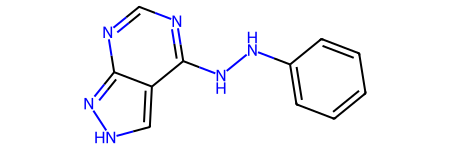

In [3]:
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np
import cairosvg
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
d = {0: ((-31.716, -9.043, 13.716), 19), -1: ((-35.883, -9.919, 11.685), 23), 2: ((-31.908, -7.674, 13.321), 16), 3: ((-30.998, -6.757, 13.883), 16), -4: ((-32.729, -6.886, 12.479), 24), -5: ((-34.87, -9.848, 12.639), 7), 6: ((-30.007, -7.1, 14.731), 19), 7: ((-30.728, -9.391, 14.564), 19), 8: ((-29.94, -8.404, 15.006), 19), 9: ((-31.329, -5.519, 13.357), 16), 10: ((-32.388, -5.613, 12.497), 4), 11: ((-32.532, -10.055, 13.212), 19), 12: ((-33.524, -9.905, 12.22), 19), -13: ((-37.207, -9.753, 12.067), 7), -14: ((-37.529, -9.524, 13.391), 7), -15: ((-36.529, -9.485, 14.347), 7), -16: ((-35.2, -9.648, 13.978), 7)}

sdf_file = 'data/casf2016/4ih5/4ih5_ligand.sdf'
save_path = 'figure/4ih5_hitatt.png'

# mol_supplier = Chem.SDMolSupplier(sdf_file)
# mol = next(mol_supplier)

with Chem.SDMolSupplier(sdf_file) as suppl:
  ms = [x for x in suppl if x is not None]
# for m in ms: tmp=AllChem.Compute2DCoords(m)
mol = ms[0]
tolerance = 1e-3

# Extract the 3D coordinates of the atoms in the molecule
conf = mol.GetConformer()

cluster_colors = [
    (1.0, 1.0, 0.0),
    (0.0, 0.0, 1.0),
    (1.0, 0.0, 0.0),
]
atom_color = [0, 0, 0, 2, 1, 1, 1, 1, 1, 1]
highlight_atoms = [11, 14, 15, 13, 16, 0, 1, 2, 3, 4]

# atom_color = [2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1]
# highlight_atoms = [1, 3, 4, 5, 9, 10, 11, 12, 13, 18, 29, 30, 31, 32, 43, 45, 46, 49, 42]
atom_colors = {highlight_atoms[i]:cluster_colors[atom_color[i]] for i in range(len(highlight_atoms))}
print(atom_colors)


# Generate 2D coordinates for the molecule
AllChem.Compute2DCoords(mol)
smi = Chem.MolToSmiles(mol)
# # print(smi)
mol = Chem.MolFromSmiles(smi)
# Draw the molecule with highlighted atoms
drawer = rdMolDraw2D.MolDraw2DCairo(2000, 2000)
# drawer.drawOptions().addAtomIndices = True
rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol, highlightAtoms=highlight_atoms, highlightAtomColors=atom_colors)
drawer.WriteDrawingText(save_path)
mol